In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_gaussian_quantiles   # 创造用于AdaBoosting的数据

In [3]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore', category=FutureWarning)

##### 1、创建数据
—— make_gaussian_quantiles() 通过分位数生成各向同性的高斯分布数据和标签样本

    mean：多维正态分布的均值，默认为(0,0)
    cov：协方差
    n_samples：样本数
    n_samples：特征数

—— np.concatenate() 数组拼接

In [4]:
X1, y1 = make_gaussian_quantiles(cov=2.,n_samples=200, n_features=2,n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=300, n_features=2,n_classes=2, random_state=1)

X = np.concatenate((X1, X2))   # 500个样本
y = np.concatenate((y1, - y2 + 1))   # y是一个由0，1组成的标签列
print(X.shape)
print(y.shape)

(500, 2)
(500,)


##### 2、构建AdaBoost模型 + 训练 + 预测 + 评估
—— AdaBoostClassifier() ：AdaBoost分类模型

    数据量大的时候，可以增加内部分类器的树深度，也可以不限制树深
    数据量小的时候，一般可以设置树深度较小，或者n_estimators较小

    base_estimator：弱分类器类型，默认为CART树；也可以选择分类决策树DecisionTreeClassifier 
    algorithm：默认是SAMME，可选SAMME 和SAMME.R。后者是优化算法，以概率调整权重，迭代速度快
    learning_rate：衰减指数，0<v<=1，默认为1
    loss：误差计算公式，可选linear、square、exponential，一般用linear

In [6]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),algorithm="SAMME.R",n_estimators=200)
model.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [7]:
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))

flat_x = np.dstack((grid_x.ravel(), grid_y.ravel())).reshape(-1,2)
flat_y = model.predict(flat_x)
grid_label =flat_y.reshape(grid_x.shape)

##### 3.1、画点图

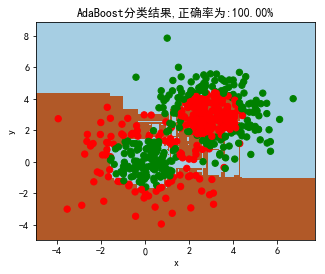

In [71]:
plt_dark = mpl.colors.ListedColormap(['g', 'r'])   # 深色，以映射y_train

plt.figure(figsize=(5,4), facecolor='w')

plt.pcolormesh(grid_x, grid_y, grid_label, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt_dark,s=40)   # 着色

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x')
plt.ylabel('y')
plt.title('AdaBoost分类结果,正确率为:%.2f%%' % (score * 100))
plt.show()

##### 着色方法二
—— np.where(ndarray == ) 返回为True的位置

In [72]:
# i = 0
# plot_colors = ['b','r']
# class_names = ['类别A','类别B']

# for names, colors in zip(class_names, plot_colors):
# #     idx = np.where(y == i)
#     plt.scatter(X[y == i, 0], X[y == i, 1],c=colors,label="%s" % names)   # 为y为0和1的点分别着色
#     i += 1

##### 3.2、画柱状图
—— decision_function(X_test) 输入训练样本，返回训练样本的决策函数值

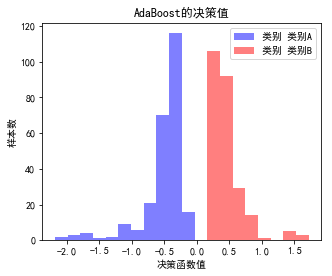

In [119]:
plt.figure(figsize=(5,4),facecolor='w')
class_names = ['类别A','类别B']
colors = ['b','r']

twoclass_output = model.decision_function(X)   # 获取决策函数值
plot_range = [twoclass_output.min(), twoclass_output.max()]   # 获取决策函数值的范围(x轴范围)

j = 0
for names, colors in zip(class_names, colors):
    plt.hist(twoclass_output[y == j],bins=20,range=plot_range,facecolor=colors,alpha=0.5,label='类别 %s' % names)
    j += 1
    
plt.legend(loc='upper right')
plt.ylabel('样本数')
plt.xlabel('决策函数值')
plt.title('AdaBoost的决策值')
plt.show()